---
title : "07. summary (1)"
author : "GC"
date : "10/10/23"
categories : [summary]]
---

# 드라이브 마운트

In [1]:
cd /content/drive/MyDrive/Colab Notebooks/ISLP/

/content/drive/MyDrive/Colab Notebooks/ISLP


# 잡담1. Keras와 tensorflow

`-` 2023 빅데분

* net 설계 및 피팅

```python
import tensorflow as tf # step 0, import

net = tf.keras.Sequential()  ## step 1. net 선언

layer = tf.keras.layers.Dense(1) ## step 2. add layer
net.add(layer)

net.compile(optimizer = "adam", loss = "mse")  ## step 3. net compile
net.fit(x_train, y_train, verbose=0,epochs=1000) ## step 4.  net fit
```

`-` 에이블 딥러닝

```python
from keras.models import Sequential # step 0. import
from keras.layers import Dense

model1 = Sequential( ) ## step 1. model 선언

model1.add(Dense(1, input_shape = (n_f,)))  ## step 2. layer 추가
model1.compile(optimizer = "adam", loss = "mse") ## step 3. 컴파일
model1.fit(x_train, y_train, epochs = 5, verbose=0) ## step 4. fit
````

`-` 하고 싶었던 이야기는 둘의 표현법이 다른거지, 실제로 같은 함수를 사용한다는 것이다.

`-` 확인법

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [3]:
print(id(tf.keras.Sequential), id(Sequential))
print(id(tf.keras.layers.Dense), id(Dense))

98540945648464 98540945648464
98540944316272 98540944316272


***

# 잡답 2. GPU vs CPU

`-` CPU(중앙처리장치) :  컴퓨터의 모든 소프트웨어에서 발생하는 연산 처리를 위한 중앙 처리 장치

`-` GPU (그래픽 처리장치)  : CPU의 사용량을 줄이고 연산의 병렬 처리를 위해 개발된 장치

* 딥러닝 같이 `epoch`에 많아지고 `node`가 많아질 수록  당연히 연산처리가 증가하므로 `GPU`의 필요성은 딥러닝에서 당연하다...

In [4]:
# code-fold : true
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
7.104058067000096
GPU (s):
0.15786673299999165
GPU speedup over CPU: 45x


`-` 추가

* 아래는 위의 예시코드인데 gpu 사용시 명시 안해줘도 됩니다.

```python
def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
```

# 1. review

`-` 일단 빅데분강의를 sub로 하고 에이블 강의로 메인으로 해서 설명하는게 좋을 것 같아  언급한 방식대로 진행하겠습니다.

### ML review

`-` [이론정리링크](https://gangcheol.github.io/mysite2/posts/DX/04.%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2023-09-28-08.%20summary%20(1).html)

`-` 머신러닝에서의 모델 설계 단계

* 데이터 이해 및 전처리는 생략

```python
from sklearn.linear_model import LinearRegression

# step 0. 데이터 셋 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2023)

# step 1. 모델 선언
lm = LinearRegression()

# step 2. 모델 fit
lm.fit(x_train, y_train)

# step 3. 모델 predict
lm.pred = lm.predict(x_test)
```

###  DL review

```python
from keras.models import Sequential
from keras.layers import Dense

# step 0. 데이터 셋 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2023)

# step 1. model 선언
model = Sequential()

# step 2 . Layer 추가
model.add(Dense(3, input_shape = (n_features,), activition = "relu"))
model.add(Dense(1, activition = "softmax"))

# step 3. model fit
model.fit(x_train, y_ytrain, epochs = 10,
                validation_spilit = 0.2)

# step 4. predict
pred = model.predict(x_test)
```

#### `use_bias = True`?


`-` 회귀분석을 예로 들어보장

In [5]:
Dense??

In [6]:
# | code-fold : true
import numpy as np
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt
tnp.experimental_enable_numpy_behavior() ## tnf 를 numpy 처럼 사용할 수 있도록 해줌
np.random.RandomState(202150256)
x = np.linspace(0,1,1000)
e = np.random.randn(1000)
y = 2.4*x  + 10 + e
hat_y = 2.4*x +10

`-` 우리가 추정해야할 세상의 법칙

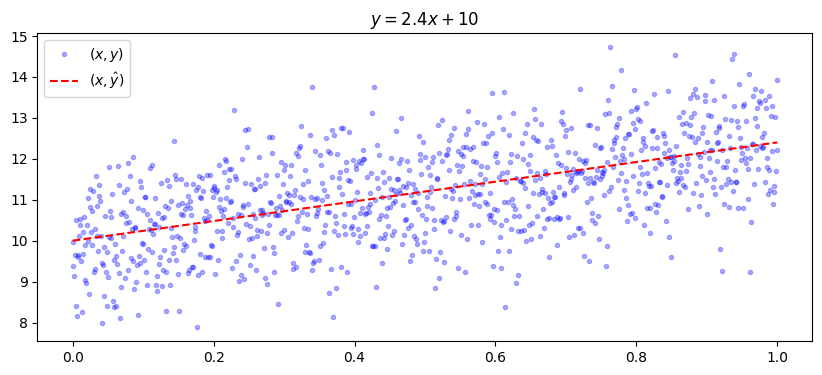

In [7]:
# | code-fold : true
plt.figure(figsize = (10,4))
plt.plot(x, y, ".b", label = r"$(x,y)$", alpha = 0.3)
plt.plot(x, hat_y, "--r",label = r"$(x,\hat y)$")
plt.title(r"$y = 2.4x + 10$")
plt.legend()
plt.show()

* case 1. 벡터형식

$$\hat y \approx 2.4x + 10$$

In [8]:
case1 = Sequential()

case1.add(Dense(1, input_shape = (1,), use_bias = True))
case1.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.56948876]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [9]:
case1 = Sequential()

case1.add(Dense(1, input_shape = (1,), use_bias = False))
case1.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.4575571]], dtype=float32)>]

* case2

$$\bf {\hat {Y}}=  \bf{X} \boldsymbol{\beta}  = \begin {bmatrix} 1 & x_1 \\ 1 & x_2
 \\ \dots & \dots  \\
1 & x_n\end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \dots  \\ \beta_n \end{bmatrix}$$

In [10]:
import pandas as pd

In [11]:
o = np.ones(1000)
X = np.concatenate([o.reshape(-1, 1), x.reshape(-1, 1)], axis = 1)
X.shape

(1000, 2)

In [12]:
case2 = Sequential()

case2.add(Dense(1, input_shape = (2,), use_bias = False))
case2.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.24006546],
        [-1.1826007 ]], dtype=float32)>]

`-` 정리

* `use_bias`는 단지 우리가 어떤 데이터를 전달할 때 위에 matrix처럼  bias를 행렬곱하기 위한  `1-vector`가 존재할 경우 `False`로 바꿔줌

* 그 이외에는 그냥 건들지 않으면 됨

***

# 2. 기본 net설계

`-` 앞서 말했듯이 전처리 과정을 제외하고는 대충 이런식...

```python
from keras.models import Sequential
from keras.layers import Dense

# step 0. 데이터 셋 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2023)

# step 1. model 선언
model = Sequential()

# step 2 . Layer 추가
model.add(Dense(3, input_shape = (n_features,), activition = "relu"))
model.add(Dense(1, activition = "softmax"))

# step 3. model fit
model.fit(x_train, y_ytrain, epochs = 10,
                validation_spilit = 0.2)

# step 4. predict
pred = model.predict(x_test)
```

## 2-1. 활성화 함수 (activation)

`-`  활성화함수란 : 은닉층 각각의 노드에서 입력한 데이터를 비선형으로 바꾸어주는 역할을 한다.

### piecewise-regreesion

`-` 예를 들어 아래와 같은 함수 형태꼴이 있다고 하자.

$$y = \begin {cases} x + 0.3\varepsilon, & x \leq 0 \\ 3.5 + 0.3\varepsilon, & x > 0 \end {cases}$$

In [13]:
x = np.linspace(-1, 1, 1000)
e = np.random.normal(size=1000)

y = list(map(lambda x,e : x + 0.3*e if x<=0 else 3.5*x +0.3*e,x,e))
y = np.array(y)

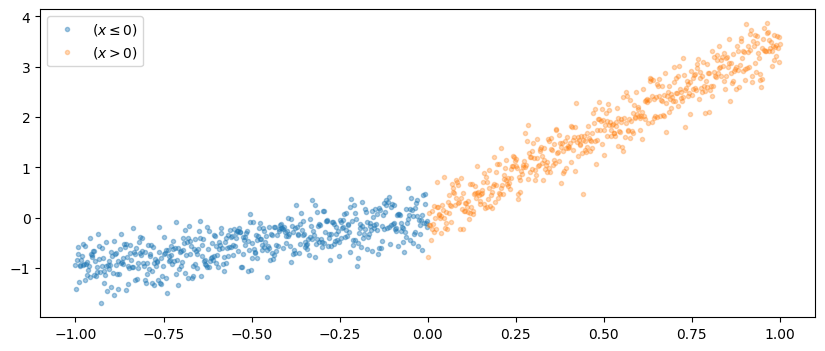

In [14]:
#| code-fold : true
plt.figure(figsize = (10, 4))
plt.plot(x[x<=0], y[x<=0], ".",  label = r"$(x \leq 0)$", alpha = 0.4)
plt.plot(x[x>0], y[x>0], ".",  label = r"$(x > 0)$",alpha = 0.3)
plt.legend()
plt.show()

In [15]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

`-` 일단 기존의 선형함수를 적합한 layer를 확인

In [16]:
## 1. 선형함수
model1= Sequential()
l1 = Dense(1, input_shape =(1,))
model1.add(l1)
model1.compile(tf.optimizers.SGD(0.1),loss = "mse")
model1.fit(x, y, epochs = 100, verbose = 0)

In [17]:
yhat1 = model1.predict(x)

32/32 [==============================] - 0s 1ms/step


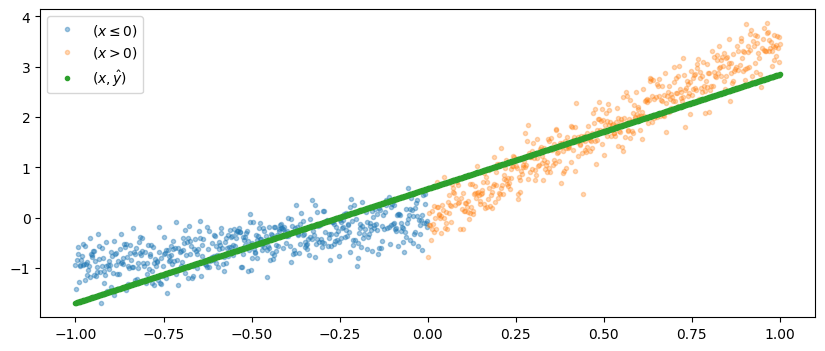

In [21]:
#| code-fold : true
plt.figure(figsize = (10, 4))
plt.plot(x[x<=0], y[x<=0], ".",  label = r"$(x \leq 0)$", alpha = 0.4)
plt.plot(x[x>0], y[x>0], ".",  label = r"$(x > 0)$",alpha = 0.3)
plt.plot(x,yhat1, ".",  label = r"$(x, \hat {y})$")
plt.legend()
plt.show()

`-` 위의 적합된 모형은 꺽은선이 아닌 선형으로 모델이 적합되었으므로 틀렸음

`-` 해결법

1. 일단 선형 레이어를 추가

2. 비선형 활성화 함수를 가지는 레이러를 추가

3. 그다음 그것들을  다시 선형 레이어에 태우면 해결할 수 있지 않나??

### `Sigmoid` vs `relu`

In [40]:
## 1. Sigmoid
model1= Sequential()
l1 = Dense(2, input_shape = (1,))
s1 = Dense(1, input_shape =(2,), activation = "sigmoid")
l2  = Dense(1, input_shape = (2,))

model1.add(l1)
model1.add(s1)
model1.add(l2)

model1.compile(tf.optimizers.SGD(0.1),loss = "mse")
model1.fit(x, y, epochs = 100, verbose = 0)

## 2. relu
model2= Sequential()

l1 = Dense(2, input_shape = (1,))
a1 = Dense(1, input_shape =(1,), activation = "relu")
l2  = Dense(1, input_shape = (2,))

model2.add(l1)
model2.add(a1)
model2.add(Dense(1))
model2.compile(tf.optimizers.SGD(0.1),loss = "mse")
model2.fit(x, y, epochs = 100, verbose = 0)

In [41]:
sig_hat = model1.predict(x)
relu_hat = model2.predict(x)

32/32 [==============================] - 0s 2ms/step


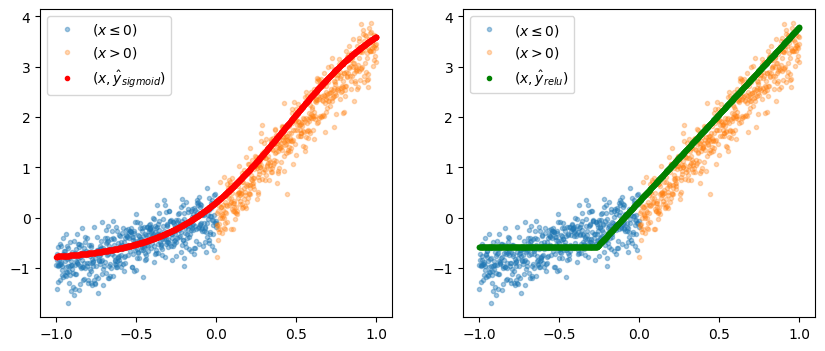

In [42]:
#| code-fold : true
fig, axes = plt.subplots(1,2, figsize = (10, 4))
ax1, ax2 = axes

ax1.plot(x[x<=0], y[x<=0], ".",  label = r"$(x \leq 0)$", alpha = 0.4)
ax1.plot(x[x>0], y[x>0], ".",  label = r"$(x > 0)$",alpha = 0.3)
ax1.plot(x,sig_hat, ".r",  label = r"$(x, \hat {y}_{sigmoid})$")
ax1.legend()

ax2.plot(x[x<=0], y[x<=0], ".",  label = r"$(x \leq 0)$", alpha = 0.4)
ax2.plot(x[x>0], y[x>0], ".",  label = r"$(x > 0)$",alpha = 0.3)
ax2.plot(x,relu_hat, ".g",  label = r"$(x, \hat {y}_{relu})$")
ax2.legend()

plt.show()

`-`  앞서 언급한 해결법

1. 일단 선형 레이어를 추가

2. 비선형 활성화 함수를 가지는 레이어를 추가

3. 그다음 그것들을  다시 선형 레이어에 태우면 해결할 수 있지 않나??

`-` relu 함수 고찰

* relu함수를 쓰는 이유는 sigmoid 함수의 기울기 소실 문제 때문이다.

 $$\frac{dy} {dx} = y(1-y) $$

$$w_t = w_{t-1} + \alpha \frac {\partial loss}{\partial w_{t+1
}}\times y(1-y)$$

* 기울기 소실이란 역전파과정에서 은닉층이 깊어질수록 역전파 되는 값이 0으로 수렴하는 것이다.

* 그런데 시그모이드 함수의 기울기는 `0 ~ 0.25`의 값을 가지므로 $t$값이 증가할 수록 역전파시 값이 전달되는 값이 적어져 결국 파라미터 업데이트가 안 되는 상황이 발생한다.

* 그래서 나온게 입력값 중 0이하의 값은  모두 0으로 처리하고 그 외의 값은 그대로 출력하는 relu함수가 등장했다.

  * relu함수의 기울기, 미분 값은 항상 0 아니면 1이므로 기울기 소실 문제가 발생할 일이 없지 않은가?

* 그러나 항상 옳은 것은 아님... 위처럼 단순한 `piece-wiseresssion`  문제에서는 오히려 sigmoid가 더 좋을 수 있음

`-` 근데, 대부분에선 `relu`가 더 좋은 성능을 발휘하고 우리는 실제로 그런 상황에 맞닥뜨릴 때니 누가 물어보면 이렇게 대답하자

* 기울기 소실 문제 때문에 relu를 씁니다.

* sigmoid 함수는 미분한 기울기 값이 0~0.25값을 가져 역전파시 업데이트할 정보가 전달되지 않는 기울기 소실문제가 발생해서 `relu`를 씁니다.

## 2-2.  손실함수 (loss)

### MSE

$$\text{MSE} = \frac {1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$

### cross-entropy

$$\text {Entropy} = - \sum_{i=1}^{m}  y_i\log_2 \hat {y}_i$$

***

## 2-3. 최적화 (optimizer)

`-` 음 이부분은 강사님이 말씀하신대로 review를 너무 잘해놓으셔서 그것만 보시면됩니다.

* 개인적인 경험 1 : 수식 다적어가서 교수님 앞에서 발표했다가 뭐하는 거냐고 혼난적 있어요....

* 개인적인 경험 2 : 실제로 adam하고 여러개 비교해봐서 돌려봤는데 adam이 최고입니다. 궁금하시면 수식 뜯어보세요. **(산디과 아니면 추천드리지 않습니다.)**

`-` 요약하자면

* Adam이란 옵티마이저는 저희가 추정하는 모델의 가중치가 loss function에서 로컬 미니멈에 빠지는 것을 그때 그떄 상황에 맞게 알아서 잘 조절해가며 요리조리 잘 피해 최적의 가중치를 찾아주는 겁니당

***

# 예제

`-` 이번 예제에서는 제가 그냥 임의의 모델 2개 만들고 예측 성능이랑 어떻게 시각화하는지 보여드릴게요.

* **이건 정답이 아니니 나중에 여러분들이 편하신 방법, 팀원들하고 합의한 방식대로 하시면 됩니다.**

`-` MNIST data를 이용하여 각각의 모델 성능을 비교

* 평가지표(precision, recall, f1_score, accuracy)를 비교

## import

In [43]:
# |code-fold : true
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

import tensorflow as tf
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

* 모델1

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, 16) | 160       |
| max_pooling2d |  (None, 14, 14, 16) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| **dense (Dense)** |    **(None, 128)**   |            401536    |
| dense_1 (Dense) |    (None, 10)   |             1290     |

* 모델2

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, **32**) | 320       |
| max_pooling2d |  (None, 14, 14, 32) |      0         |
| flatten (Flatten) | (None, 6272)   |           0         |
| dense (Dense) |    (None, 128)   |            802944        |
| dense_1 (Dense) |    (None, 10)   |             1290     |

## 데이터 이해 및 전처리

In [47]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [48]:
x_train = x_train/255
x_val = x_val/255

##  각각 모델링

In [45]:
model1 = Sequential([Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', strides = 1, activation="relu"  ),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense( 128, activation = "relu"),
                    Dense(10, activation = "softmax" )
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

model2 = Sequential([ Conv2D(32, kernel_size  =(3, 3), input_shape = (28, 28, 1), padding='same', strides = 1, activation = "relu"  ),
                     MaxPooling2D(pool_size =(2, 2), strides=2),
                     Flatten (),
                     Dense(128, activation = "relu" ),
                     Dense(10, activation= "softmax")
])

model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

In [51]:
h1 = model1.fit(x_train, y_train, epochs = 10, validation_split=0.2, verbose = 0).history
h2 = model2.fit(x_train, y_train, epochs = 10, validation_split=0.2, verbose = 0).history

## model save

`-` 이것 떄문에 드라이브 마운트 하는 거에요. 안하면 런타임 끊길경우 모델링 다시 수행해야합니다.

In [54]:
model1.save("mode1.h5")
model2.save("mode2.h5")

## model load

In [56]:
from keras.models import load_model

m1 = load_model("mode1.h5")
m2 = load_model("mode2.h5")

### 예측

In [57]:
pred1 = m1.predict(x_val).argmax(axis = 1)
pred2 = m2.predict(x_val).argmax(axis = 1)

313/313 [==============================] - 1s 3ms/step


### 각 예측성능 지표 저장

In [68]:
#| code-fold : true
acc = accuracy_score(y_val,pred1)
pre = precision_score(y_val,pred1, average = "macro")
re = recall_score(y_val,pred1, average = "macro")
f1 = f1_score(y_val,pred1, average = "macro")
df1 = pd.DataFrame([acc,pre,re,f1])
df1["model"] = "model1"
df1["measure"] = ["accuracy", "precision", "recall", "F1_score"]
df1= df1.rename(columns = {0 : "value"})


acc = accuracy_score(y_val,pred2)
pre = precision_score(y_val,pred2, average = "macro")
re = recall_score(y_val,pred2, average = "macro")
f1 = f1_score(y_val,pred2, average = "macro")
df2 = pd.DataFrame([acc,pre,re,f1])
df2["model"] = "model2"
df2["measure"] = ["accuracy", "precision", "recall", "F1_score"]
df2= df2.rename(columns = {0 : "value"})

total1 = pd.concat([df1,df2],axis = 0)
total1

,value,model,measure
0,0.984400,model1,accuracy
1,0.984280,model1,precision
2,0.984329,model1,recall
3,0.984253,model1,F1_score
0,0.983100,model2,accuracy
1,0.983138,model2,precision
2,0.982968,model2,recall
3,0.982984,model2,F1_score


### 예제1. net + `matploltlib`

#### 시각화 1. `fig` + `axes`

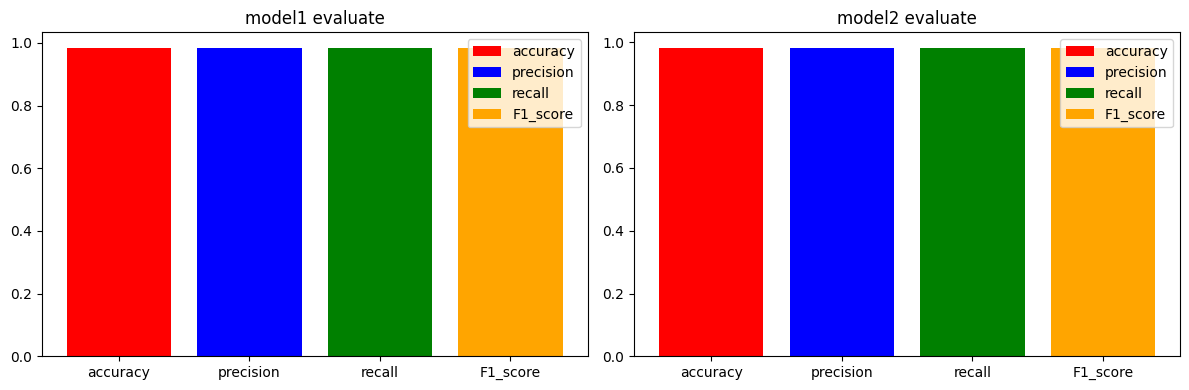

In [86]:
# code-fold : true
fig, axes = plt.subplots(1,2, figsize = (12, 4)) # step 1. 도화지 선언

ax1, ax2 = axes ## step 2. 각 축의 이름 선언

bar_colors = ['red', 'blue', 'green', 'orange']
bar_labels = ['accuracy', 'precision', "recall", 'F1_score']
ax1.bar(df1["measure"], df1["value"], label=bar_labels, color=bar_colors)
ax1.set_title("model1 evaluate")
ax1.legend()

ax2.bar(df2["measure"], df2["value"], label=bar_labels, color=bar_colors)
ax2.set_title("model2 evaluate")
ax2.legend()

fig.tight_layout()
fig.show()

#### 시각화 2. `fig` + `loof` : 별로 추천안함..

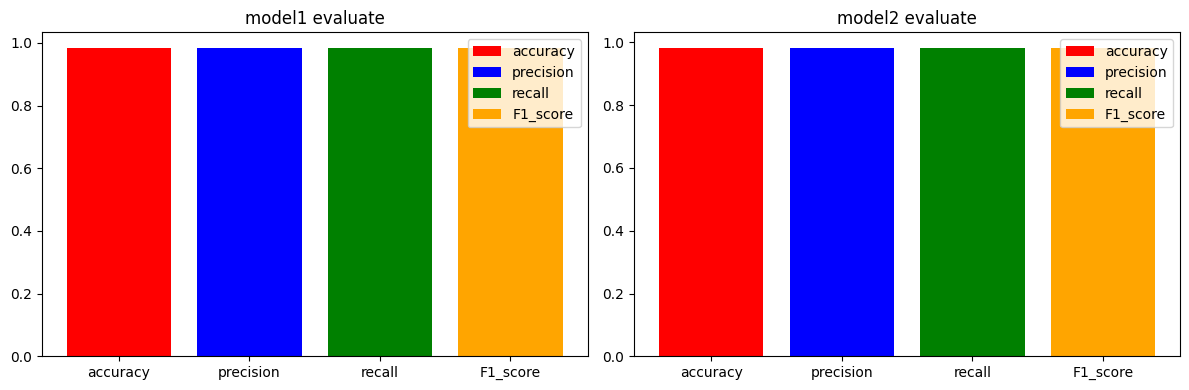

In [93]:
# code-fold : true
fig, axes = plt.subplots(1,2, figsize = (12, 4)) # step 1. 도화지 선언


bar_colors = ['red', 'blue', 'green', 'orange']
bar_labels = ['accuracy', 'precision', "recall", 'F1_score']
t = ["model1 evaluate", "model2 evaluate"]
for i in range(1,3) :
      exec(f'axes[{i-1}].bar(df{i}["measure"], df{i}["value"], label=bar_labels, color=bar_colors)')
      axes[i-1].set_title(t[i-1])
      axes[i-1].legend()

fig.tight_layout()
fig.show()

### 예제2. net + `matploltlib` + `seaborn`

In [94]:
total1

,value,model,measure
0,0.984400,model1,accuracy
1,0.984280,model1,precision
2,0.984329,model1,recall
3,0.984253,model1,F1_score
0,0.983100,model2,accuracy
1,0.983138,model2,precision
2,0.982968,model2,recall
3,0.982984,model2,F1_score


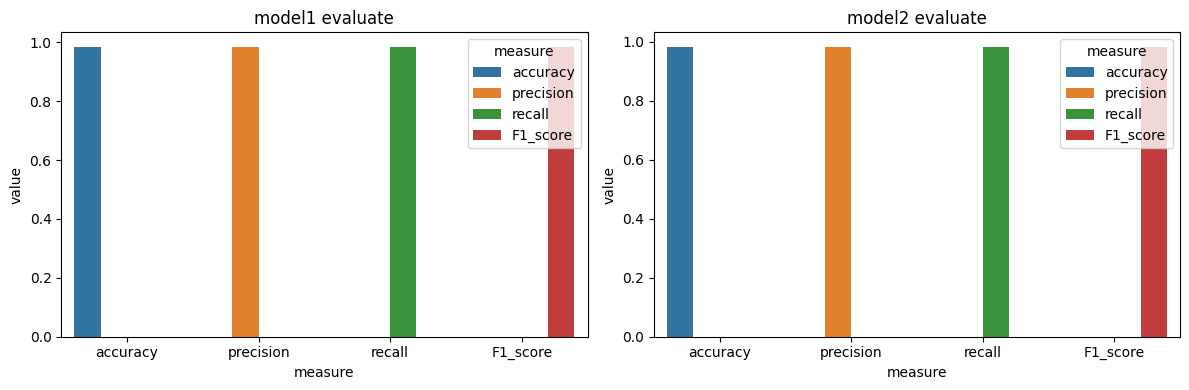

In [109]:
fig, axes = plt.subplots(1,2, figsize = (12, 4)) # step 1. 도화지 선언

sns.barplot(x = df1["measure"], y = df1["value"],
                    hue = df1["measure"], ax = axes[0])
axes[0].set_title("model1 evaluate")

sns.barplot(x = df2["measure"], y = df2["value"],
                    hue = df2["measure"], ax = axes[1])
axes[1].set_title("model2 evaluate")

fig.tight_layout()
fig.show()

### 예제3. net + `plotly`

In [110]:
total1

,value,model,measure
0,0.984400,model1,accuracy
1,0.984280,model1,precision
2,0.984329,model1,recall
3,0.984253,model1,F1_score
0,0.983100,model2,accuracy
1,0.983138,model2,precision
2,0.982968,model2,recall
3,0.982984,model2,F1_score


`-` 파라미터 요약

* x, y  : 위에 tidydata에서 표시할 값들

* color : 색깔을 표시할 변수

* facet_col : subplots을 표시할 변수

* kind : 사용할 chart의 종류

* backend : backend 연산을 해서 그래프를 만들 때 어떤 그래프를 사용할 것인가??

In [114]:
total1.plot(x = "measure", y ="value",
                    color = "measure", facet_col = "model",
                  kind = "bar", backend = "plotly", width = 500 , height = 500, opacity = 0.5 )